## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
# Importing all necessary packages
import torch
print(torch.__version__)
print(torch.cuda.is_available())
from torchvision import datasets, transforms, models
from torch import nn, optim
import torch.nn.functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

2.1.0+cu121
True


In [ ]:
# Datasets directory
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
# TODO: Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

tesval_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# TODO: Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
val_data = datasets.ImageFolder(valid_dir, transform=tesval_transforms)
test_data = datasets.ImageFolder(test_dir, transform=tesval_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [ ]:
# A dictionary mapping the integer encoded categories to the actual names of the flowers
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [ ]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 134MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# TODO: Build and train your network
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(nn.Linear(1024,457),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(457, 102),
                                 nn.LogSoftmax(dim=1))

model.class_to_idx = train_data.class_to_idx
model.cat_to_name = cat_to_name
criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);

In [ ]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# Training the model
epochs = 5
for epoch in range(epochs):
    print("Training....")
    model.train()
    running_loss = 0
    for images, labels in trainloader:
        # Move input and label tensors to the default device
        images, labels = images.to(device), labels.to(device)


        optimizer.zero_grad()

        logps = model.forward(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # Validation step
    model.eval()
    val_loss = 0
    accuracy = 0
    print("Validating....")
    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device), labels.to(device)
            logps = model.forward(images)
            batch_loss = criterion(logps, labels)

            val_loss += batch_loss.item()

            # Calculate accuracy
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equality = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equality.type(torch.FloatTensor)).item()

    print(f"Epoch {epoch+1}/{epochs}.. "
          f"Train loss: {running_loss/len(trainloader):.3f}.. "
          f"Validation loss: {val_loss/len(valloader):.3f}.. "
          f"Validation accuracy: {accuracy/len(valloader):.3f}")

Training....
Validating....
Epoch 1/5.. Train loss: 2.697.. Validation loss: 0.981.. Validation accuracy: 0.759
Training....
Validating....
Epoch 2/5.. Train loss: 1.133.. Validation loss: 0.531.. Validation accuracy: 0.855
Training....
Validating....
Epoch 3/5.. Train loss: 0.890.. Validation loss: 0.450.. Validation accuracy: 0.890
Training....
Validating....
Epoch 4/5.. Train loss: 0.783.. Validation loss: 0.388.. Validation accuracy: 0.897
Training....
Validating....
Epoch 5/5.. Train loss: 0.701.. Validation loss: 0.326.. Validation accuracy: 0.918


In [ ]:
# testing our network on test data not seen during training
test_loss = 0
accuracy = 0

# Turn off gradients for validation, saves memory and computations
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()


print(
      "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
      "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Test Loss: 0.325..  Test Accuracy: 0.907


In [ ]:
# Saving checkpoint
checkpoint = {
    'input_size': 1024,
    'output_size': 102,
    'hidden_units': 457,
    'state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'criterion': criterion,
    'class_to_idx': model.class_to_idx,
    'cat_to_name': model.cat_to_name
}

torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
#Loading the checkpoint
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)

    # Create a new instance of the model with the same architecture
    loaded_model = models.densenet121(pretrained=True)
    for param in loaded_model.parameters():
        param.requires_grad = False

    loaded_model.classifier = nn.Sequential(nn.Linear(checkpoint['input_size'], 457),
                                            nn.ReLU(),
                                            nn.Dropout(0.2),
                                            nn.Linear(457, checkpoint['output_size']),
                                            nn.LogSoftmax(dim=1))

    loaded_model.load_state_dict(checkpoint['state_dict'])
    loaded_model.class_to_idx = checkpoint['class_to_idx']
    loaded_model.cat_to_name = checkpoint['cat_to_name']

    loaded_optimizer = optim.Adam(loaded_model.classifier.parameters(), lr=0.003)
    loaded_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    loaded_criterion = checkpoint['criterion']

    return loaded_model, loaded_optimizer, loaded_criterion

In [ ]:
# Inference for classification
#Image preprocessing

def process_image(image_path):
    # Load image using PIL
    pil_image = Image.open(image_path)
    # Apply transformations
    pil_image = tesval_transforms(pil_image)

    # Convert to NumPy array
    np_image = np.array(pil_image)

    # Transpose the color channel
    np_image = np_image.transpose((0, 2, 1))

    return torch.from_numpy(np_image)

In [ ]:
# To check your work, the function below converts a PyTorch tensor and displays it in the notebook.
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

<Axes: >

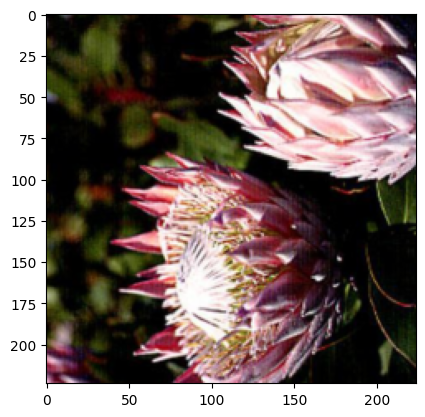

In [ ]:
# Checking if function works as expected
%matplotlib inline
image = process_image('flowers/test/13/image_05761.jpg')
imshow(image)

In [ ]:
# Class prediction using the model
def predict(image_path, model, topk=5):
    # Process the image
    processed_image = process_image(image_path)

    # Convert to a 4D tensor
    input_tensor = processed_image.unsqueeze(0)

    # Set the model to evaluation mode
    model.eval()

    # Forward pass
    with torch.no_grad():
        output = model(input_tensor)

    # Calculate probabilities and indices of the top K predictions
    probabilities, indices = torch.topk(torch.exp(output), topk)

    # Convert indices to class labels using the class_to_idx mapping
    idx_to_class = {v: k for k, v in model.class_to_idx.items()}
    top_classes = [idx_to_class[idx.item()] for idx in indices[0]]

    # Convert probabilities and class labels to lists
    probabilities = probabilities[0].numpy().tolist()
    top_classes = [str(cls) for cls in top_classes]

    return probabilities, top_classes

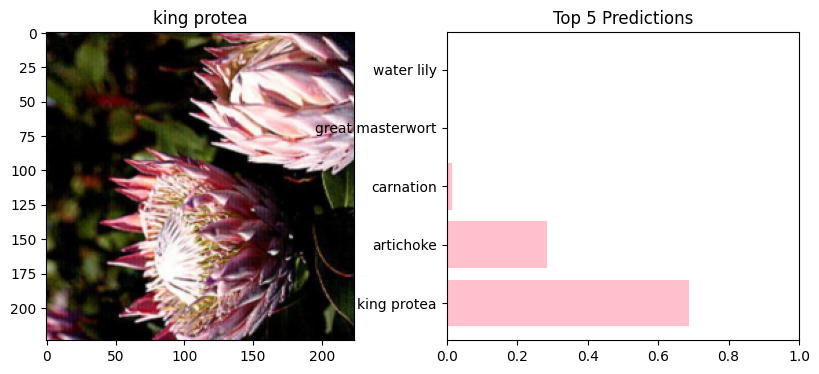

In [ ]:
# Use trained network for prediction and do a sanity check

# Specify the path to the image you want to predict and extract label
image_path = 'flowers/test/13/image_05761.jpg'
flower_label = os.path.basename(os.path.dirname(image_path))
flower_name = cat_to_name.get(flower_label, 'Unknown')

loaded_model, _, _ = load_checkpoint('checkpoint.pth')

# Predict image
probs, classes = predict(image_path, loaded_model, topk=5)

# Get the label of the top prediction
top_prediction_labels = [cat_to_name[class_label] for class_label in classes]


# Display the input image and the bar graph of top predictions
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2)

# Display the input image with the actual flower name as the title
original_image = process_image(image_path)
imshow(original_image, ax=ax1)
ax1.set_title(f'{flower_name}')

# Plot the bar graph of top prediction probabilities
ax2.barh(top_prediction_labels, probs, color='pink')
ax2.set_xlim(0, 1)
ax2.set_title('Top 5 Predictions')

plt.show()